In [1]:
import matplotlib.pyplot as plt
import matplotlib.ticker
import numpy as np
import pandas as pd
import wmfdata as wmf

In [3]:
%matplotlib inline

In [9]:
wmf.charting.set_mpl_style()

In [4]:
frame = pd.read_parquet("secrets/sampling-frame.parquet").drop("email", axis=1)
frame.info()

<class 'pandas.core.frame.DataFrame'>
Index: 33113 entries, !Silent to ＫｏＺ
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   home_project   33113 non-null  category
 1   global_edits   33113 non-null  float64 
 2   project_group  33113 non-null  category
 3   edit_bin       33113 non-null  category
dtypes: category(3), float64(1)
memory usage: 660.6+ KB


# Distribution of yearly edit counts

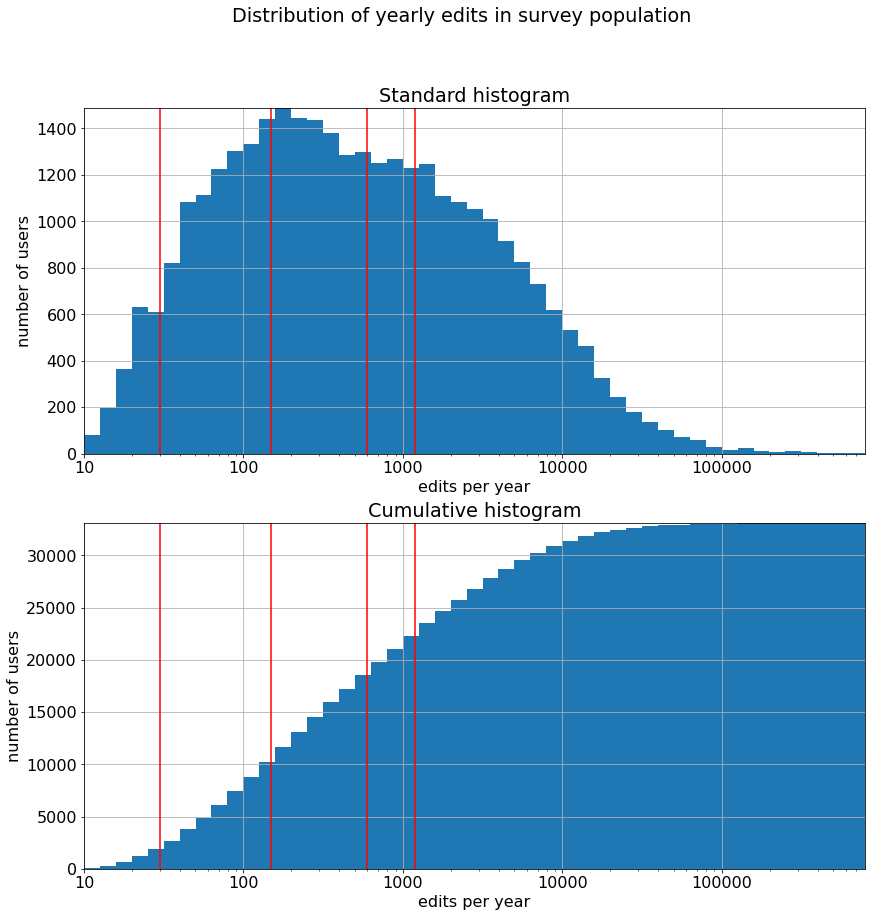

In [10]:
bin_edges = [30, 150, 600, 1200]

fig_size = plt.rcParams["figure.figsize"]

fig, (ax1, ax2) = plt.subplots(
    # 2 rows, 1 column
    2, 1,
    # Make the figure double height
    figsize = (fig_size[0], fig_size[1] * 2),
)

fig.suptitle("Distribution of yearly edits in survey population")

def set_common(ax, cumulative = False):
    ax.hist(
        frame["global_edits"],
        bins = 10**np.arange(1, 6, 0.1),
        cumulative = cumulative
    )
    
    ax.set_xscale("log", basex = 10)
    ax.xaxis.set_major_formatter(matplotlib.ticker.FormatStrFormatter("%d"))
    
    
    ax.set_ylabel("number of users")
    ax.set_xlabel("edits per year")

    for edge in bin_edges:
        ax.axvline(x = edge, color = "red")

set_common(ax1)
set_common(ax2, True)
ax1.set_title("Standard histogram")
ax2.set_title("Cumulative histogram")

plt.show()